In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**TRAITEMENTS PRELIMINAIRES DES DONNEES**

In [3]:
df = pd.read_csv('dataverse_files/Avian_influenza_wildlife_surveillance_France_2016_to_2022.csv')
df.head()

,uid,ID,Results_of_analysis,Bird_species_FR,CD_nom,Bird_species_LAT,Bird_family_latin,Code_INSEE_municipality,Obs_date,Zone_of_enhanced_surveillance_ZRP,Name_ZRP,Nb_birds_lab_pools,X_Municipality_centroid_Lambert93,Y_Municipality_centroid_Lambert93
0,3887,44_20221116_B,HP,Goeland_argente,3302,Larus_argentatus,Laridae,44211,18/08/2022,Yes,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
1,3888,26_20220321_A,negative,Milan_royal,2846,Falco_milvus,Accipitridae,26064,20/01/2022,No,NaN,1.0,858600,6425700
2,3903,41_20180724_A,negative,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,22/05/2018,No,NaN,1.0,574450,6684932
3,3901,31_20210304_A,negative,Pigeon_biset,3420,Columba_livia,Columbidae,31488,03/02/2021,No,NaN,1.0,578848,6286405
4,3892,07_20220518_A,negative,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,29/03/2022,Yes,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   uid                                4076 non-null   int64  
 1   ID                                 4076 non-null   object 
 2   Results_of_analysis                4076 non-null   object 
 3   Bird_species_FR                    4076 non-null   object 
 4   CD_nom                             4076 non-null   int64  
 5   Bird_species_LAT                   4076 non-null   object 
 6   Bird_family_latin                  4062 non-null   object 
 7   Code_INSEE_municipality            4076 non-null   object 
 8   Obs_date                           4076 non-null   object 
 9   Zone_of_enhanced_surveillance_ZRP  4076 non-null   object 
 10  Name_ZRP                           1901 non-null   object 
 11  Nb_birds_lab_pools                 4069 non-null   float

In [5]:
df.describe()

,uid,CD_nom,Nb_birds_lab_pools,X_Municipality_centroid_Lambert93,Y_Municipality_centroid_Lambert93
count,4076.000000,4076.000000,4069.000000,4.076000e+03,4.076000e+03
mean,2052.422964,37557.934985,1.517080,6.006043e+05,6.709835e+06
std,1202.335989,129386.864672,1.538115,2.428472e+05,2.376212e+05
min,1.000000,0.000000,1.000000,1.033080e+05,6.109485e+06
25%,1019.750000,2506.000000,1.000000,3.860240e+05,6.546843e+06
50%,2038.500000,2708.000000,1.000000,6.041950e+05,6.754640e+06
75%,3057.250000,3342.000000,1.000000,8.124670e+05,6.875424e+06
max,4770.000000,895998.000000,19.000000,1.236284e+06,7.108280e+06


In [6]:
# CHANGEMENT DE L'INDEX DU DATAFRAME

print(len(df['uid'].unique()))
print(df.index)

#On peut donc prendre la colonne 'uid' comme index

df = df.set_index('uid')

4076
RangeIndex(start=0, stop=4076, step=1)


In [7]:
# SUPPRESSION DES COLONNES INUTILES

df = df.drop('ID',axis=1)

In [8]:
# RENOMMAGE DES COLONNES

df.columns = ['Test_PCR_positif','Espece_nom_fr','Espece_ID','Espece_nom_latin','Famille_nom_latin','Commune_ID','Date_observation','ZRP','ZRP_Name','Nombre_oiseaux_analyses','X_localisation','Y_localisation']
# 'ZRP' = 'Zone à Risque Particulier', définies au niveau gouvernemental

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 3887 to 4625
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Test_PCR_positif         4076 non-null   object 
 1   Espece_nom_fr            4076 non-null   object 
 2   Espece_ID                4076 non-null   int64  
 3   Espece_nom_latin         4076 non-null   object 
 4   Famille_nom_latin        4062 non-null   object 
 5   Commune_ID               4076 non-null   object 
 6   Date_observation         4076 non-null   object 
 7   ZRP                      4076 non-null   object 
 8   ZRP_Name                 1901 non-null   object 
 9   Nombre_oiseaux_analyses  4069 non-null   float64
 10  X_localisation           4076 non-null   int64  
 11  Y_localisation           4076 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 414.0+ KB


In [9]:
df.head()

,Test_PCR_positif,Espece_nom_fr,Espece_ID,Espece_nom_latin,Famille_nom_latin,Commune_ID,Date_observation,ZRP,ZRP_Name,Nombre_oiseaux_analyses,X_localisation,Y_localisation
uid,,,,,,,,,,,,
3887,HP,Goeland_argente,3302,Larus_argentatus,Laridae,44211,18/08/2022,Yes,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
3888,negative,Milan_royal,2846,Falco_milvus,Accipitridae,26064,20/01/2022,No,NaN,1.0,858600,6425700
3903,negative,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,22/05/2018,No,NaN,1.0,574450,6684932
3901,negative,Pigeon_biset,3420,Columba_livia,Columbidae,31488,03/02/2021,No,NaN,1.0,578848,6286405
3892,negative,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,29/03/2022,Yes,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


In [10]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Test__PCR_positif' :

print(df['Test_PCR_positif'].unique())
print('Ancien type dans la colonne Test_PCR_positif :',df['Test_PCR_positif'].dtypes)

df['Test_PCR_positif'] = (df['Test_PCR_positif']=='HP')
print('Nouveau type dans la colonne Test_PCR_positif :',df['Test_PCR_positif'].dtypes)

['HP' 'negative']
Ancien type dans la colonne Test_PCR_positif : object
Nouveau type dans la colonne Test_PCR_positif : bool


In [11]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'ZRP' :

print(df['ZRP'].unique())
print('Ancien type dans la colonne ZRP :',df['ZRP'].dtypes)

df['ZRP'] = (df['ZRP']=='Yes')
print('Nouveau type dans la colonne ZRP :',df['ZRP'].dtypes)

['Yes' 'No']
Ancien type dans la colonne ZRP : object
Nouveau type dans la colonne ZRP : bool


In [12]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Date_observation' :

print('Ancien type dans la colonne Date_observation :',df['Date_observation'].dtypes)

df['Date_observation'] = df['Date_observation'].astype('datetime64[ns]')

print('Nouveau type dans la colonne Date_observation :',df['Date_observation'].dtypes)


Ancien type dans la colonne Date_observation : object
Nouveau type dans la colonne Date_observation : datetime64[ns]


In [13]:
# AMELIORATION DU TYPE DE DONNEES CONTENUES DANS 'Nombre_oiseaux_analyses' :

# NE FONCTIONNE PAS A CAUSE DES NA !

#print('Ancien type dans la colonne Nombre_oiseaux_analyses :',df['Nombre_oiseaux_analyses'].dtypes)

#df['Nombre_oiseaux_analyses'] = df['Nombre_oiseaux_analyses'].astype(int)
#print('Nouveau type dans la colonne Nombre_oiseaux_analyses :',df['Nombre_oiseaux_analyses'].dtypes)

In [14]:
df.head()

,Test_PCR_positif,Espece_nom_fr,Espece_ID,Espece_nom_latin,Famille_nom_latin,Commune_ID,Date_observation,ZRP,ZRP_Name,Nombre_oiseaux_analyses,X_localisation,Y_localisation
uid,,,,,,,,,,,,
3887,True,Goeland_argente,3302,Larus_argentatus,Laridae,44211,2022-08-18,True,DPM_DE_MESQUER_AU_CROISIC_ET_BAIE_DE_VILAINE,1.0,285931,6708326
3888,False,Milan_royal,2846,Falco_milvus,Accipitridae,26064,2022-01-20,False,NaN,1.0,858600,6425700
3903,False,Pelican_blanc,2460,Pelecanus_onocrotalus,Pelecanidae,41198,2018-05-22,False,NaN,1.0,574450,6684932
3901,False,Pigeon_biset,3420,Columba_livia,Columbidae,31488,2021-03-02,False,NaN,1.0,578848,6286405
3892,False,Pigeon_ramier,3424,Columba_palumbus,Columbidae,7349,2022-03-29,True,FLEUVE_ET_VALLEE_DU_RHONE,1.0,840540,6413065


# **Représentations graphiques générales**

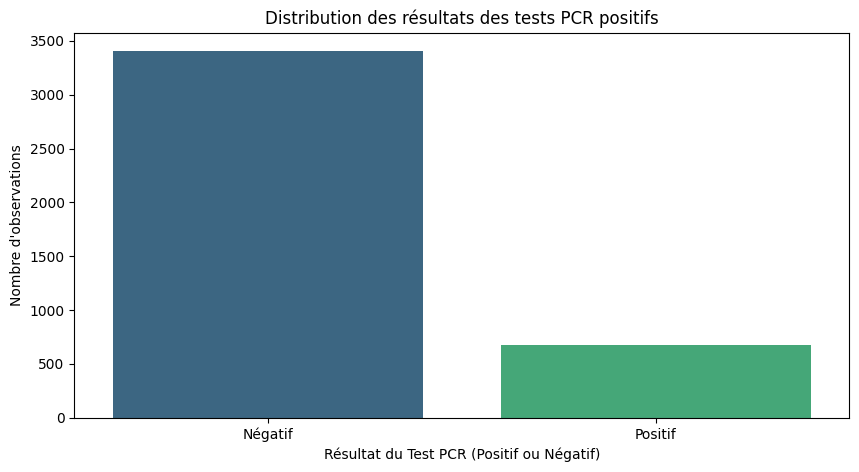

In [54]:
# DISTRBUTION DES RESULTATS DES ANALYSES

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df, 
    x='Test_PCR_positif', 
    hue='Test_PCR_positif', 
    palette='viridis', 
    legend=False
)
plt.title('Distribution des résultats des tests PCR positifs')
plt.xlabel('Résultat du Test PCR (Positif ou Négatif)')
plt.ylabel('Nombre d\'observations')
plt.xticks([0, 1], ['Négatif', 'Positif'])  # Remplace True/False par Négatif/Positif
plt.show()

Text(0, 0.5, 'Nombre de tests réalisés')

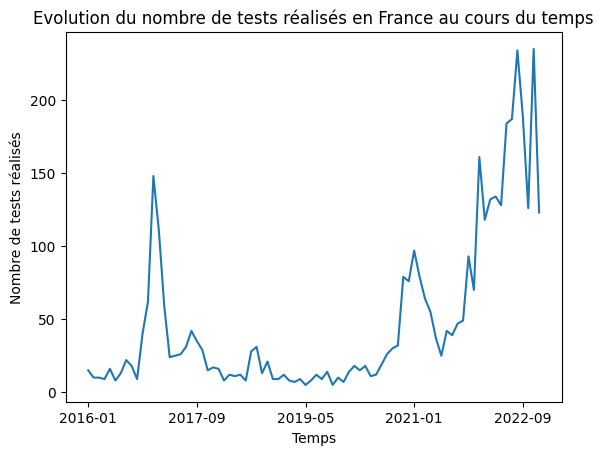

In [15]:
# ANALYSE DE LA FREQUENCE DES TESTS EFFECTUES SUR LES OISEAUX

df['A/M_observation'] = df['Date_observation'].dt.strftime('%Y-%m')
freq = df.groupby(by='A/M_observation')
freq.size().plot()
plt.title('Evolution du nombre de tests réalisés en France au cours du temps')
plt.xlabel('Temps')
plt.ylabel('Nombre de tests réalisés')

Est-ce que une épidémie implique une hausse du nb de test ? Sans doute

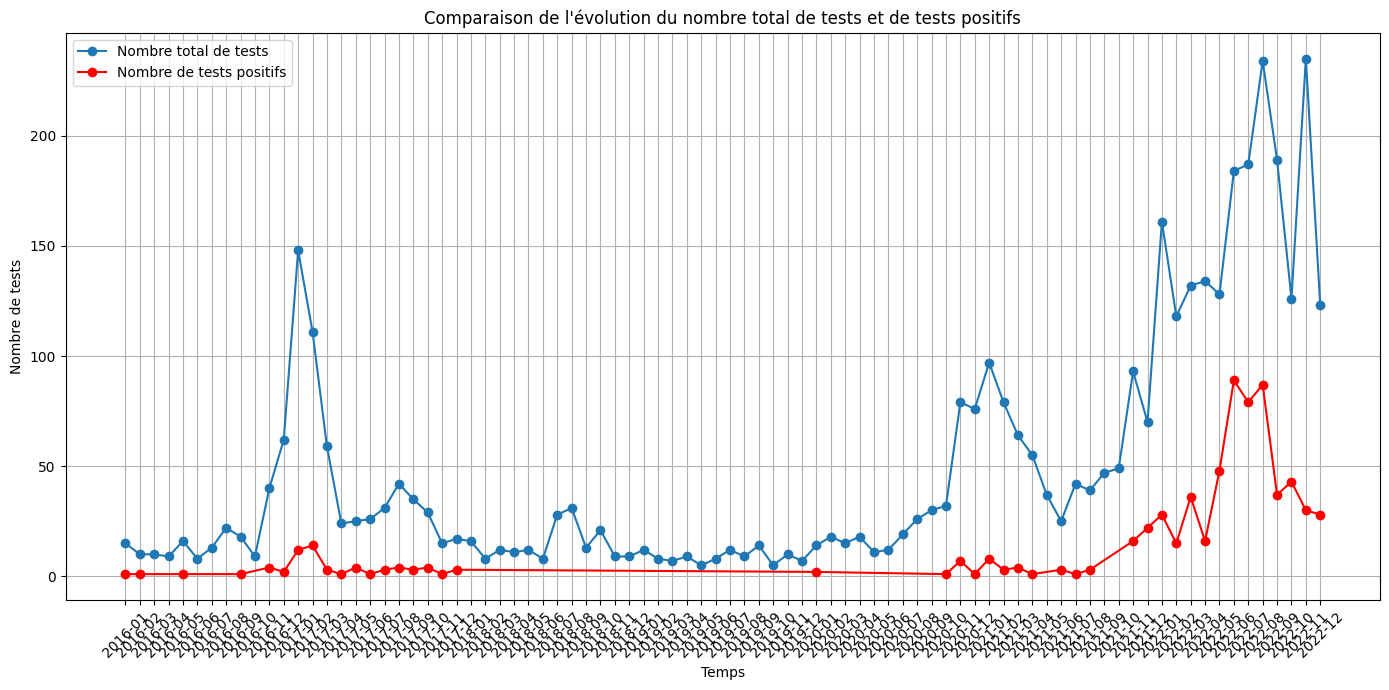

In [45]:
# Groupement par mois
total_tests_per_month = df.groupby('A/M_observation').size()
positive_tests_per_month = df[df['Test_PCR_positif']].groupby('A/M_observation').size()

# Création du graphique comparatif
plt.figure(figsize=(14, 7))
plt.plot(total_tests_per_month.index, total_tests_per_month.values, label='Nombre total de tests', marker='o')
plt.plot(positive_tests_per_month.index, positive_tests_per_month.values, label='Nombre de tests positifs', marker='o', color='red')
plt.title('Comparaison de l\'évolution du nombre total de tests et de tests positifs')
plt.xlabel('Temps')
plt.ylabel('Nombre de tests')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

On observe que les périodes où le nombre de tests positifs augmente sont souvent accompagnées d’une hausse simultanée ou précédée du nombre total de tests effectués. Cela suggère que les autorités de surveillance peuvent intensifier les tests en réponse à des signaux d’alerte ou des foyers d’infection identifiés.

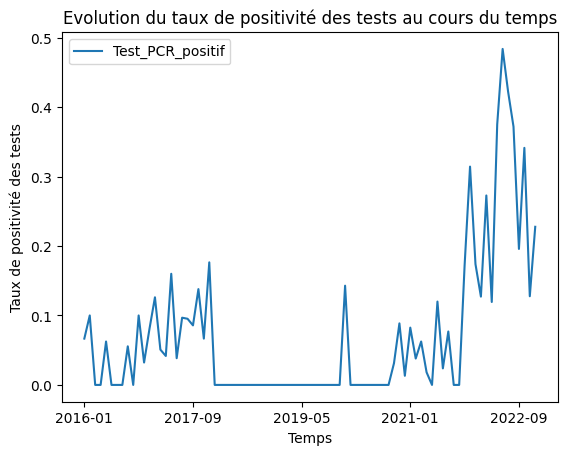

In [59]:
# PROPORTION DE TEST POSITIFS SELON LE TEMPS

chronologie = df.pivot_table(
    values='Test_PCR_positif',
    index='A/M_observation')

chronologie.plot()
plt.title('Evolution du taux de positivité des tests au cours du temps')
plt.xlabel('Temps')
plt.ylabel('Taux de positivité des tests')
plt.show()

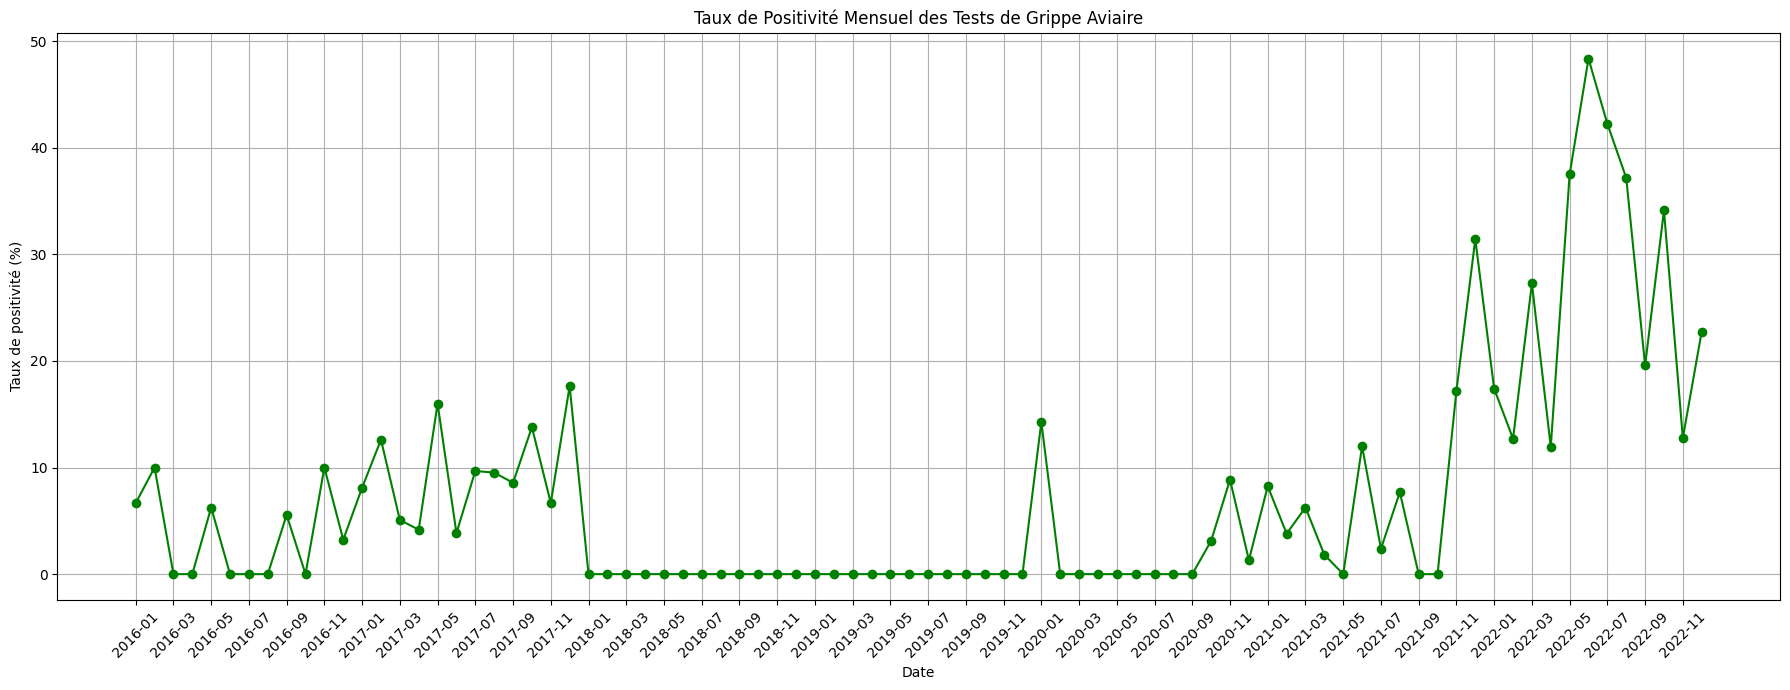

In [50]:
# PROPORTION DE TEST POSITIFS SELON LE TEMPS

# Calcul du taux de positivité par mois
total_tests_per_month = df.groupby('A/M_observation').size()
positive_tests_per_month = df[df['Test_PCR_positif']].groupby('A/M_observation').size()
positivity_rate_per_month = (positive_tests_per_month / total_tests_per_month * 100).fillna(0)

# Création du graphique avec élargissement de l'espace sur l'axe des abscisses
plt.figure(figsize=(18, 7))  # Augmentation de la largeur de la figure
plt.plot(positivity_rate_per_month.index, positivity_rate_per_month.values, marker='o', linestyle='-', color='green')
plt.title('Taux de Positivité Mensuel des Tests de Grippe Aviaire')
plt.xlabel('Date')
plt.ylabel('Taux de positivité (%)')
plt.grid(True)

# Réglage des étiquettes de l'axe x pour afficher une étiquette sur deux, par exemple
plt.xticks(positivity_rate_per_month.index[::2], rotation=45)

plt.tight_layout()
plt.show()

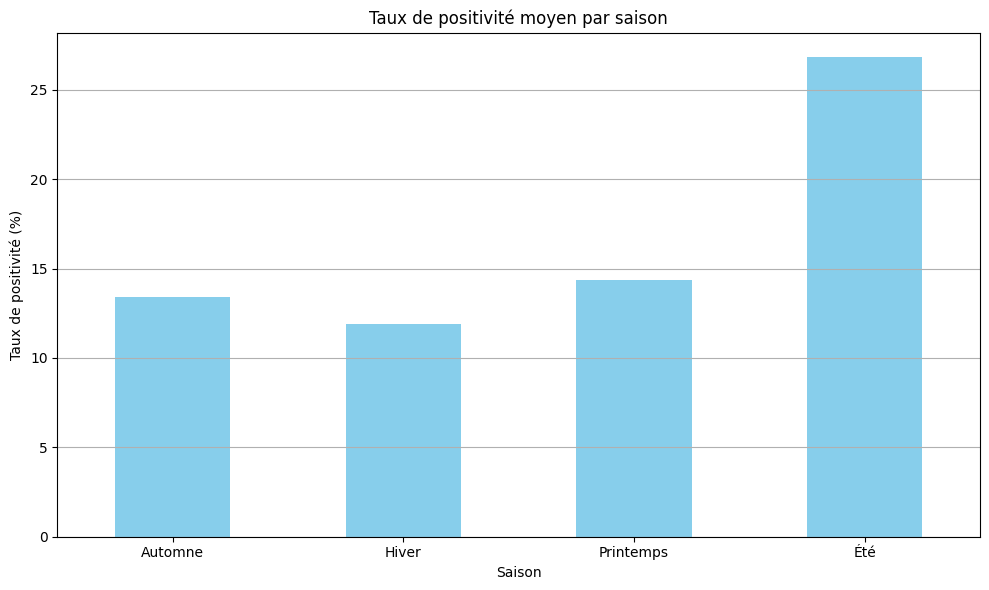

In [53]:

# Ajout d'une colonne pour identifier la saison en fonction de la date d'observation
df['Saison'] = df['Date_observation'].dt.month % 12 // 3 + 1
df['Saison'] = df['Saison'].replace({1: 'Hiver', 2: 'Printemps', 3: 'Été', 4: 'Automne'})

# Calcul du taux de positivité moyen par saison
total_tests_per_season = df.groupby('Saison').size()
positive_tests_per_season = df[df['Test_PCR_positif']].groupby('Saison').size()
positivity_rate_per_season = (positive_tests_per_season / total_tests_per_season * 100).fillna(0)

# Création du graphique
plt.figure(figsize=(10, 6))
positivity_rate_per_season.plot(kind='bar', color='skyblue')
plt.title('Taux de positivité moyen par saison')
plt.xlabel('Saison')
plt.ylabel('Taux de positivité (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Si le graphique montre que l'été a un taux de positivité significativement plus élevé que les autres, cela pourrait indiquer une augmentation des cas positifs pendant cette période. Cela pourrait être lié à des facteurs environnementaux, tels que la migration des oiseaux, des températures plus basses favorisant la propagation du virus, ou d’autres conditions favorables à la transmission. L'hypothèse à explorer est que les pics saisonniers pourraient être associés à des événements tels que les rassemblements d’oiseaux migrateurs ou des changements dans les comportements des oiseaux en réponse aux conditions climatiques. 

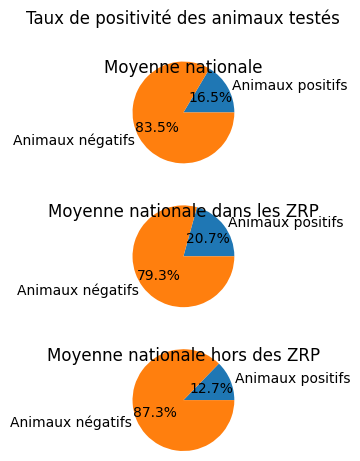

In [17]:
# INFLUENCE DES ZRP

Répartition = ['Animaux positifs','Animaux négatifs']

D1 = [df['Test_PCR_positif'].mean(),1-df['Test_PCR_positif'].mean()]

Influence_ZRP = df.pivot_table(
    values='Test_PCR_positif',
    index='ZRP')

D2 = [Influence_ZRP.iloc[1,0],1-Influence_ZRP.iloc[1,0]]
D3 = [Influence_ZRP.iloc[0,0],1-Influence_ZRP.iloc[0,0]]

fig, axs = plt.subplots(3,1)
fig.suptitle('Taux de positivité des animaux testés')
axs[0].pie(D1, labels=Répartition, autopct='%1.1f%%',radius=2)
axs[0].set_title('Moyenne nationale')
axs[1].pie(D2, labels=Répartition, autopct='%1.1f%%',radius=2)
axs[1].set_title('Moyenne nationale dans les ZRP')
axs[2].pie(D3, labels=Répartition, autopct='%1.1f%%',radius=2)
axs[2].set_title('Moyenne nationale hors des ZRP')
plt.tight_layout()


# Et pdt une pandémie ? Les observations sont elles modifiées ?

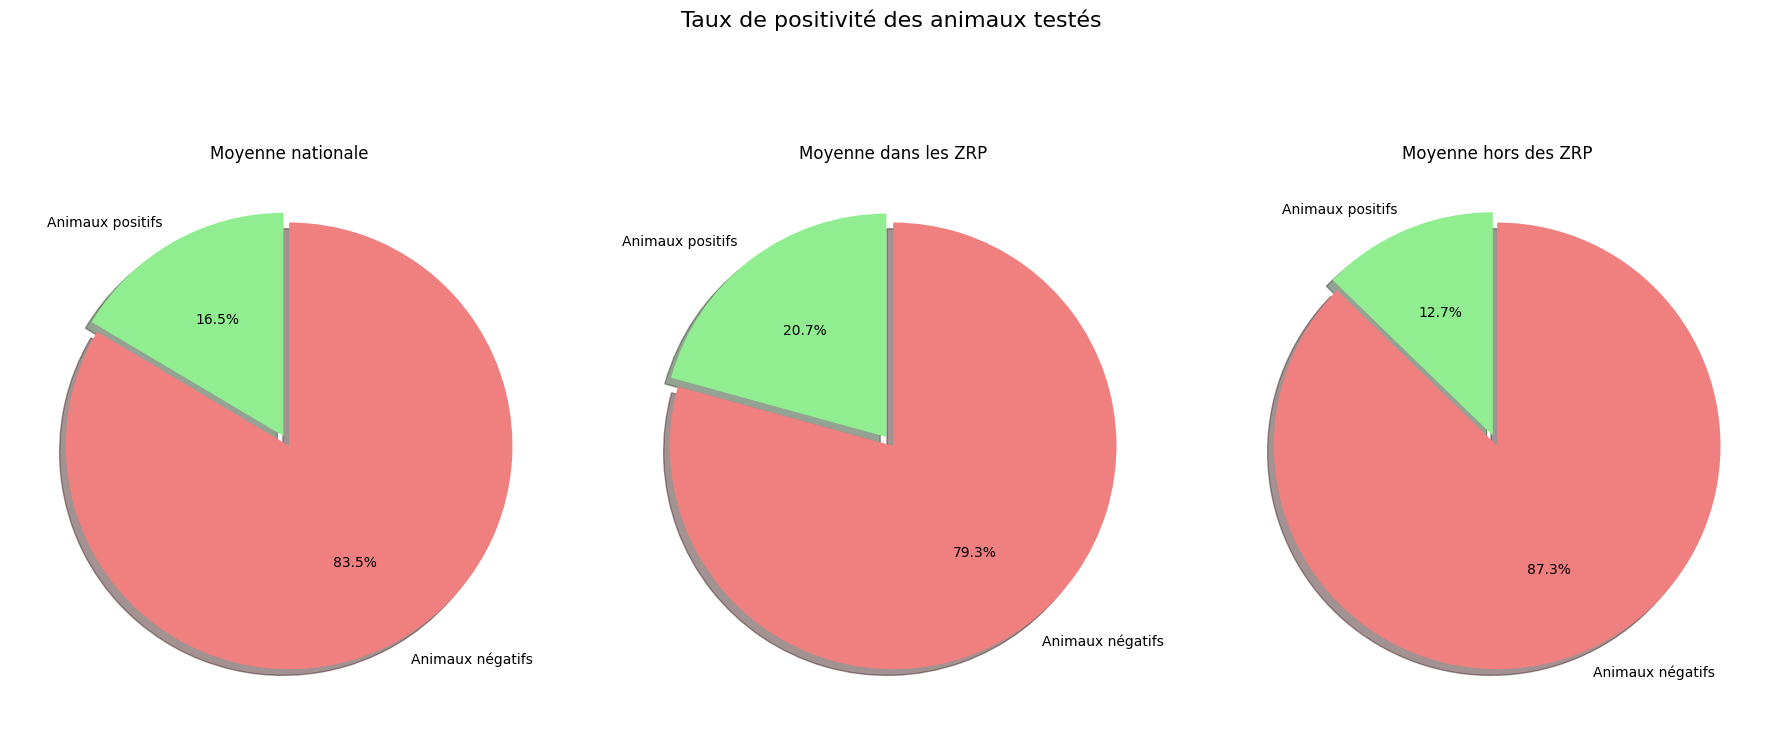

In [64]:
# INFLUENCE DES ZRP

Répartition = ['Animaux positifs', 'Animaux négatifs']

# Moyenne nationale
D1 = [df['Test_PCR_positif'].mean(), 1 - df['Test_PCR_positif'].mean()]

# Moyenne dans les ZRP et hors ZRP
Influence_ZRP = df.pivot_table(values='Test_PCR_positif', index='ZRP')
D2 = [Influence_ZRP.loc[True, 'Test_PCR_positif'], 1 - Influence_ZRP.loc[True, 'Test_PCR_positif']]
D3 = [Influence_ZRP.loc[False, 'Test_PCR_positif'], 1 - Influence_ZRP.loc[False, 'Test_PCR_positif']]

# Création des camemberts
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Taux de positivité des animaux testés', fontsize=16)

# Camembert pour la moyenne nationale
axs[0].pie(D1, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[0].set_title('Moyenne nationale')

# Camembert pour la moyenne dans les ZRP
axs[1].pie(D2, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[1].set_title('Moyenne dans les ZRP')

# Camembert pour la moyenne hors des ZRP
axs[2].pie(D3, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[2].set_title('Moyenne hors des ZRP')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuster l'espace en haut pour le titre
plt.show()

Pendant une pandémie, les observations sont-elles modifiés ?

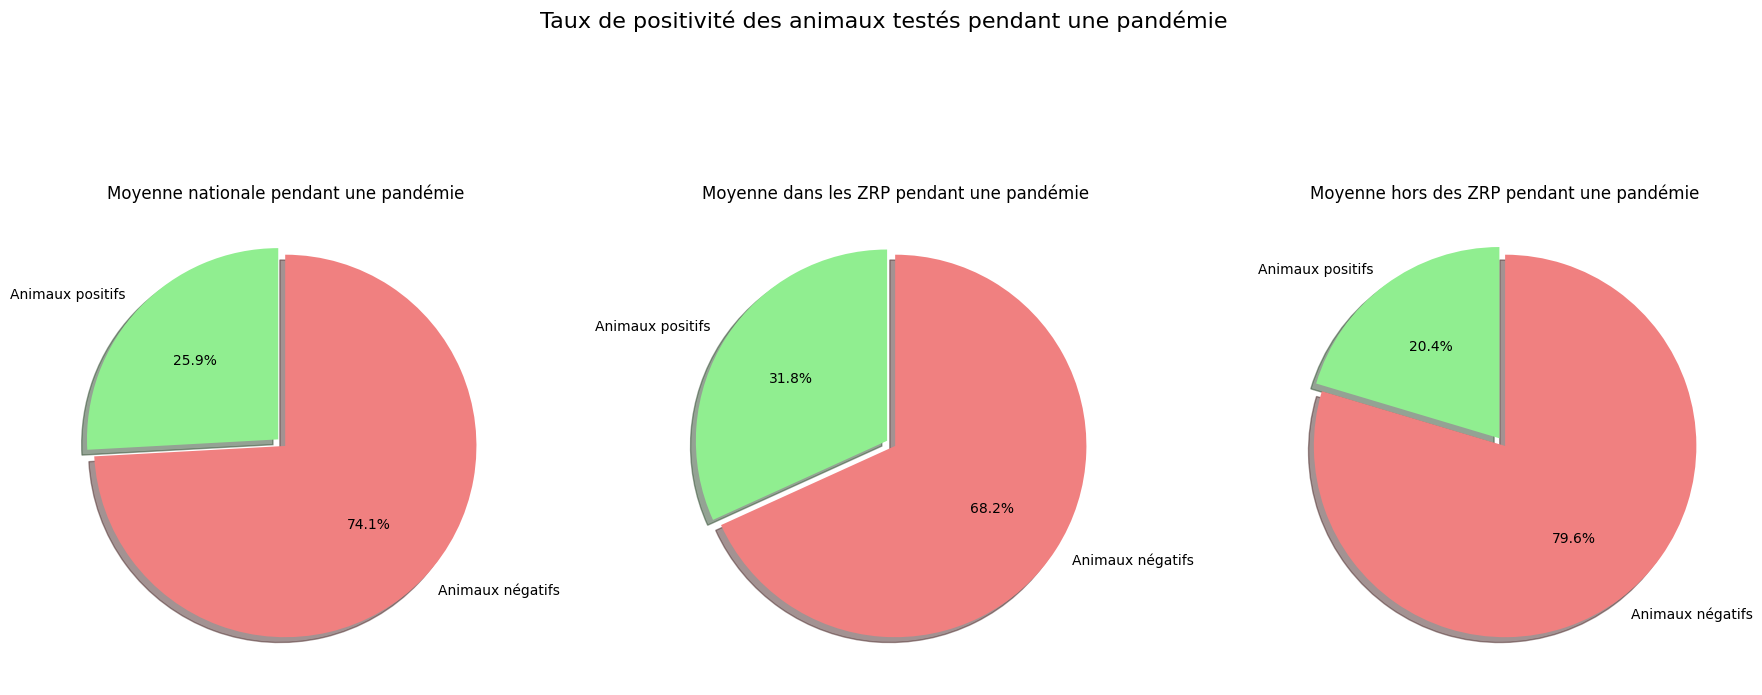

In [65]:
# Définir un seuil de taux de positivité pour considérer une période comme une "pandémie"
pandemic_threshold = 10  # Exemple : taux de positivité supérieur à 10%

# Calcul du taux de positivité mensuel
total_tests_per_month = df.groupby('A/M_observation').size()
positive_tests_per_month = df[df['Test_PCR_positif']].groupby('A/M_observation').size()
positivity_rate_per_month = (positive_tests_per_month / total_tests_per_month * 100).fillna(0)

# Déterminer les mois de pandémie
pandemic_months = positivity_rate_per_month[positivity_rate_per_month > pandemic_threshold].index

# Filtrer les données pour les mois de pandémie
df_pandemic = df[df['A/M_observation'].isin(pandemic_months)]

# Moyenne nationale pendant la pandémie
D1_pandemic = [df_pandemic['Test_PCR_positif'].mean(), 1 - df_pandemic['Test_PCR_positif'].mean()]

# Moyenne dans les ZRP et hors ZRP pendant la pandémie
Influence_ZRP_pandemic = df_pandemic.pivot_table(values='Test_PCR_positif', index='ZRP')
D2_pandemic = [Influence_ZRP_pandemic.loc[True, 'Test_PCR_positif'], 1 - Influence_ZRP_pandemic.loc[True, 'Test_PCR_positif']]
D3_pandemic = [Influence_ZRP_pandemic.loc[False, 'Test_PCR_positif'], 1 - Influence_ZRP_pandemic.loc[False, 'Test_PCR_positif']]

# Création des camemberts pendant une pandémie
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle('Taux de positivité des animaux testés pendant une pandémie', fontsize=16)

# Camembert pour la moyenne nationale pendant une pandémie
axs[0].pie(D1_pandemic, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[0].set_title('Moyenne nationale pendant une pandémie')

# Camembert pour la moyenne dans les ZRP pendant une pandémie
axs[1].pie(D2_pandemic, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[1].set_title('Moyenne dans les ZRP pendant une pandémie')

# Camembert pour la moyenne hors des ZRP pendant une pandémie
axs[2].pie(D3_pandemic, labels=Répartition, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], shadow=True, startangle=90, explode=(0.05, 0))
axs[2].set_title('Moyenne hors des ZRP pendant une pandémie')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Ajuster l'espace en haut pour le titre
plt.show()

Comme le taux de positivité dans les ZRP est significativement plus élevé que dans les zones hors ZRP, cela valide leur rôle comme zones à risque accru pendant une pandémie.
Comme la moyenne nationale se situe entre les valeurs des ZRP et des zones hors ZRP, cela confirme que les ZRP contribuent à la détection des cas et justifie leur mise en place.

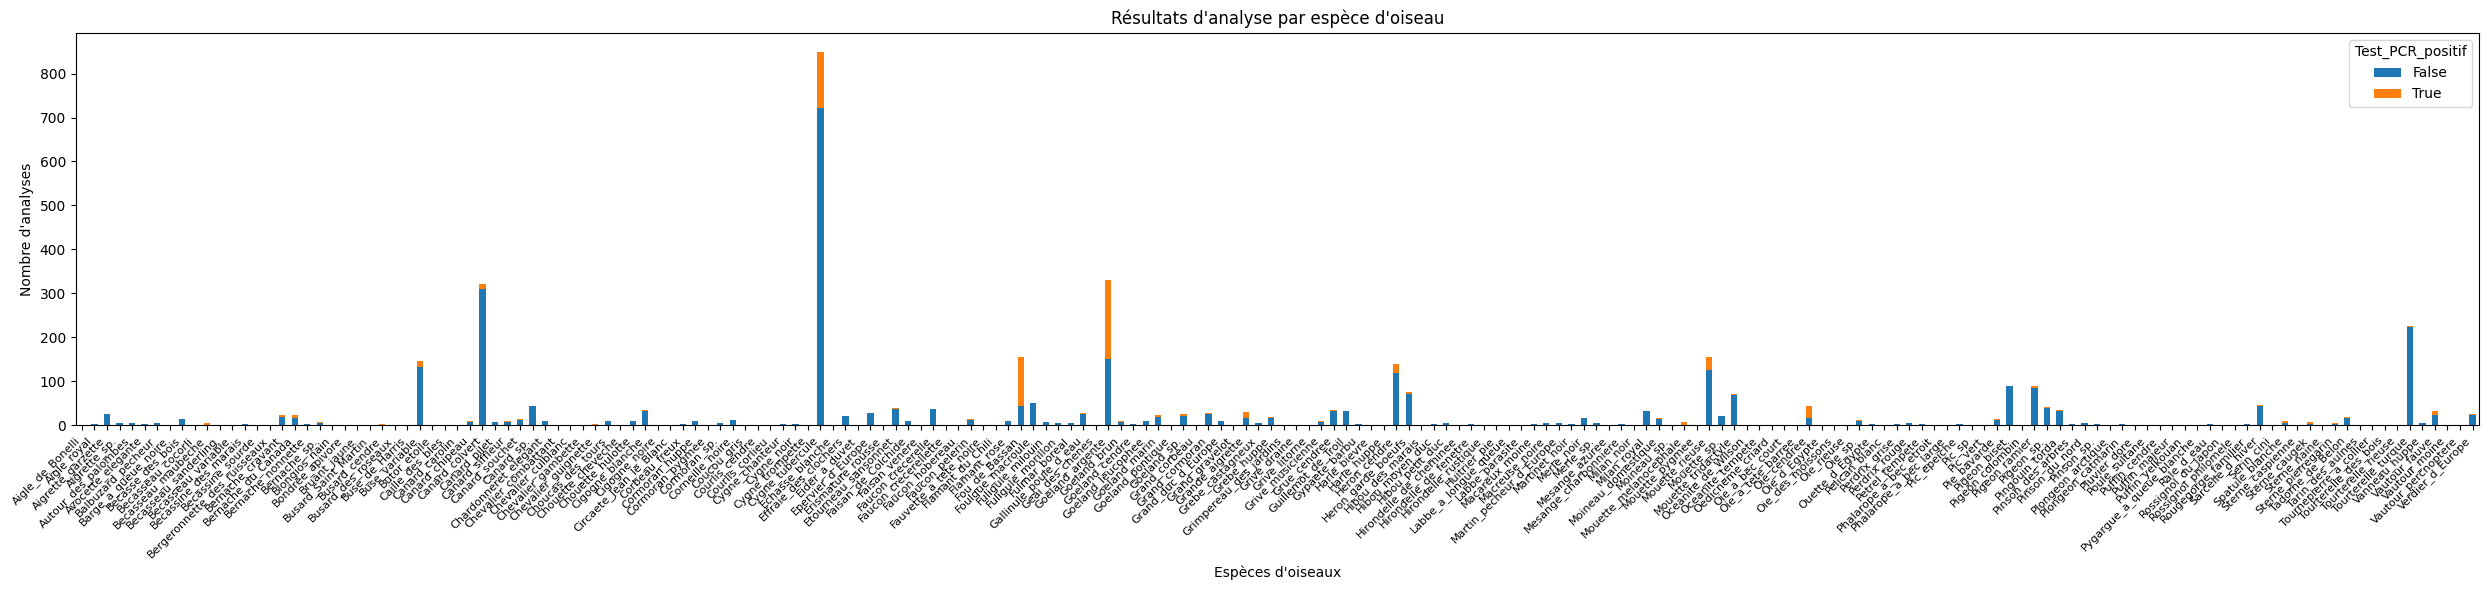

In [18]:
# AGREGATION DE DONNEES : RESULTAT D'ANALYSE PAR ESPECE D'OISEAU
#    IDEES ->>>> SUPPRIMER TOUTES LES BARRES DE HAUTEUR NEGLIGEABLE

bird_analysis_counts = df.groupby(['Espece_nom_fr', 'Test_PCR_positif']).size().unstack(fill_value=0)

bird_analysis_counts.plot(kind='bar', stacked=True, figsize=(25, 6))
plt.title("Résultats d'analyse par espèce d'oiseau")
plt.ylabel("Nombre d'analyses")
plt.xlabel("Espèces d'oiseaux")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

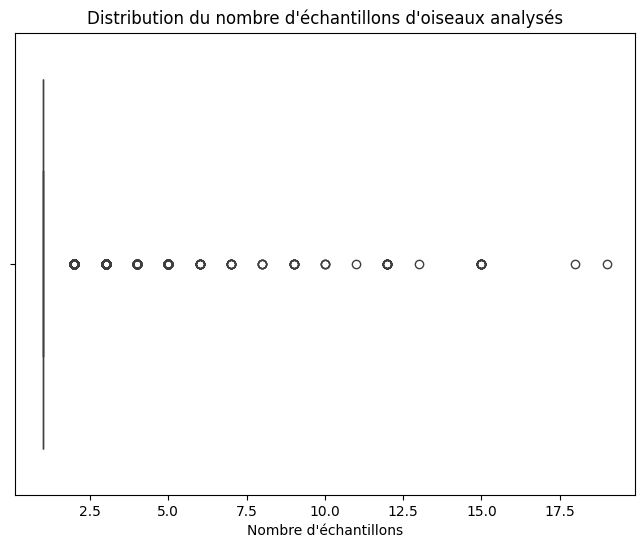

In [19]:
# VISUALISATION DE LA DISTRIBUTION DU NOMBRE D'ECHANTILLONS D'OISEAUX ANALYSES

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Nombre_oiseaux_analyses'])
plt.title("Distribution du nombre d'échantillons d'oiseaux analysés")
plt.xlabel("Nombre d'échantillons")
plt.show()

**REPARTITION GEOGRAPHIQUE DES EPIDEMIES**

In [20]:
df_bis = pd.read_csv('dataverse_files/Correspondance-code-insee-code-postal.csv',sep=';',encoding='latin-1')
df_bis.describe()

,Code INSEE,Code Postal,Commune,Département,Région
count,36742,36742,36742,36742,36742
unique,36742,6101,34130,101,27
top,64012,51300,SAINTE-COLOMBE,['PAS-DE-CALAIS'],['MIDI-PYRENEES']
freq,1,46,14,895,3020


In [21]:
df_merge = df.merge(df_bis[['Code INSEE','Code Postal','Département']].rename(columns={'Code Postal': 'Code_postal','Département': 'Departement'}),left_on="Commune_ID", right_on="Code INSEE").drop('Code INSEE', axis=1)

In [22]:
# REPARTITION GEOGRAPHIQUE DES TESTS REALISES SUR LES OISEAUX
(df_merge.groupby('Departement').size()*100/len(df_merge)).sort_values(ascending = False)

Departement
['LOIRE-ATLANTIQUE']    6.231600
['FINISTERE']           4.465162
['SOMME']               4.293425
['NORD']                3.925417
['MANCHE']              3.900883
                          ...   
['CORREZE']             0.147203
['ARIEGE']              0.147203
['HAUTE-LOIRE']         0.098135
['HAUTES-ALPES']        0.098135
['LOT']                 0.073602
Length: 95, dtype: float64

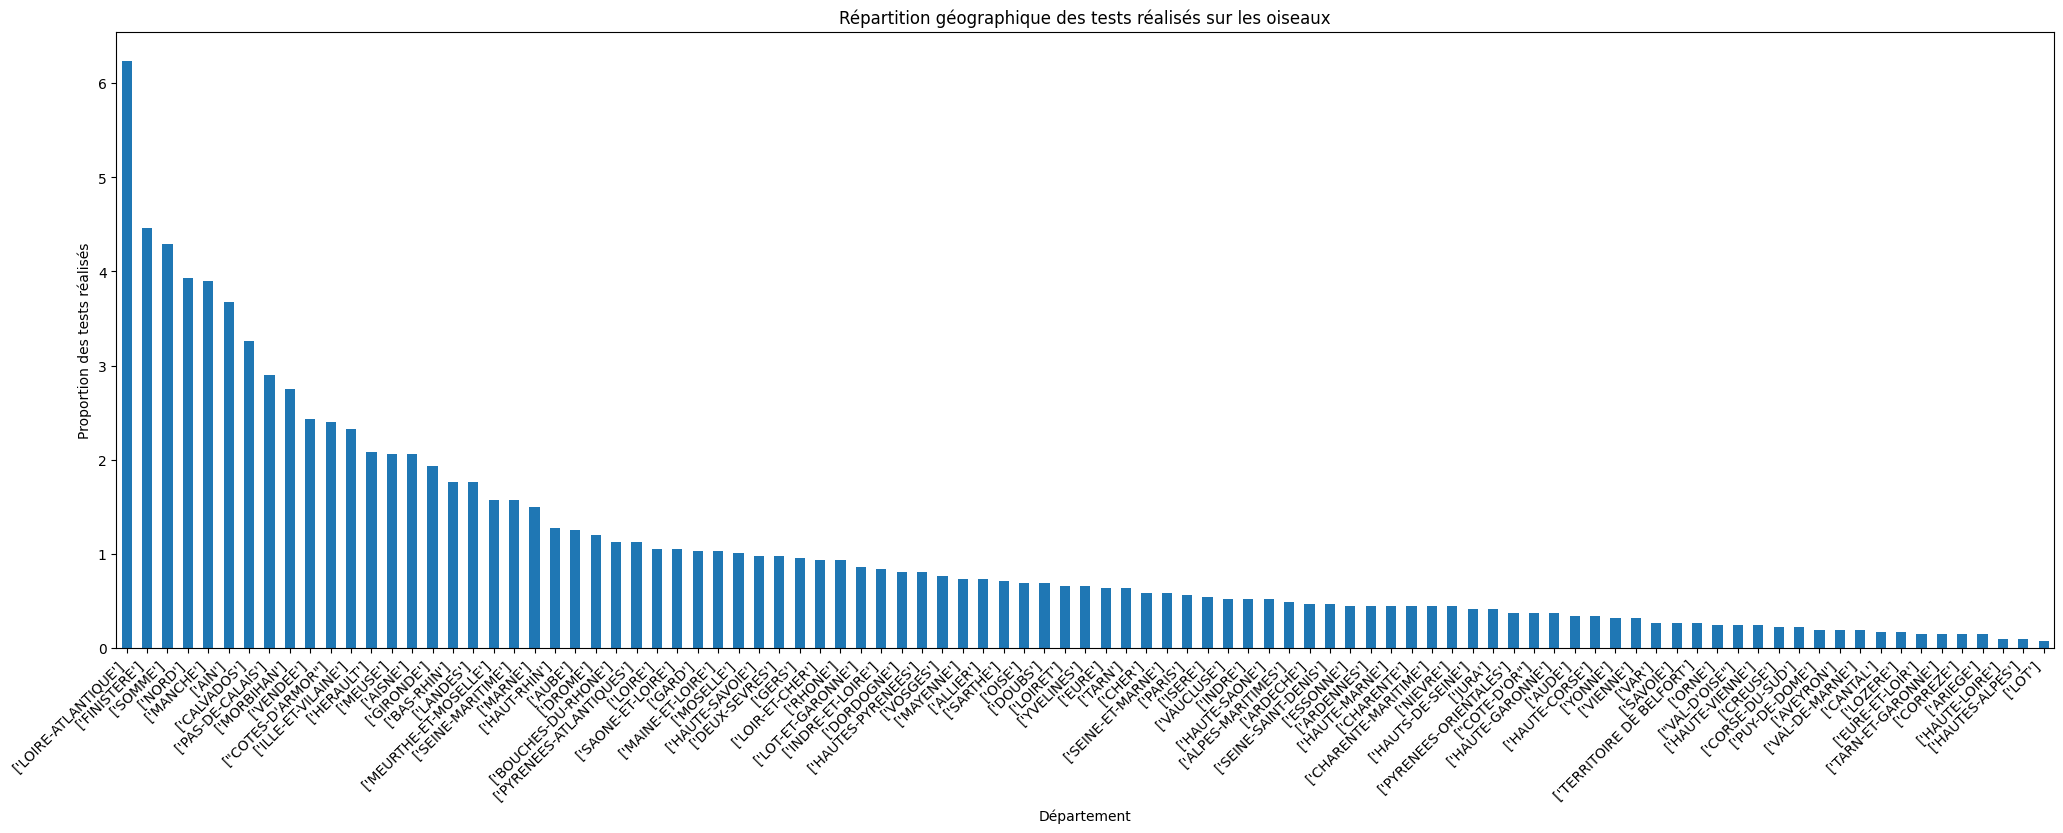

In [23]:
(df_merge.groupby('Departement').size()*100/len(df_merge)).sort_values(ascending = False).plot(kind='bar', stacked=True, figsize=(25, 8))
plt.title("Répartition géographique des tests réalisés sur les oiseaux")
plt.ylabel("Proportion des tests réalisés")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [24]:
# REPARTITION GEOGRAPHIQUE DES TESTS POSITIFS
g = df_merge.groupby('Departement')['Test_PCR_positif'].mean().sort_values(ascending = False)
g.head(15)

Departement
['AVEYRON']              0.500000
['CHARENTE-MARITIME']    0.444444
['CALVADOS']             0.428571
['SEINE-MARITIME']       0.421875
['SOMME']                0.405714
['MANCHE']               0.402516
['AIN']                  0.373333
['ALLIER']               0.333333
['MEUSE']                0.285714
['LOZERE']               0.285714
['HAUTE-MARNE']          0.277778
["COTES-D'ARMOR"]        0.275510
['PAS-DE-CALAIS']        0.237288
['LOIRE-ATLANTIQUE']     0.220472
['GERS']                 0.205128
Name: Test_PCR_positif, dtype: float64

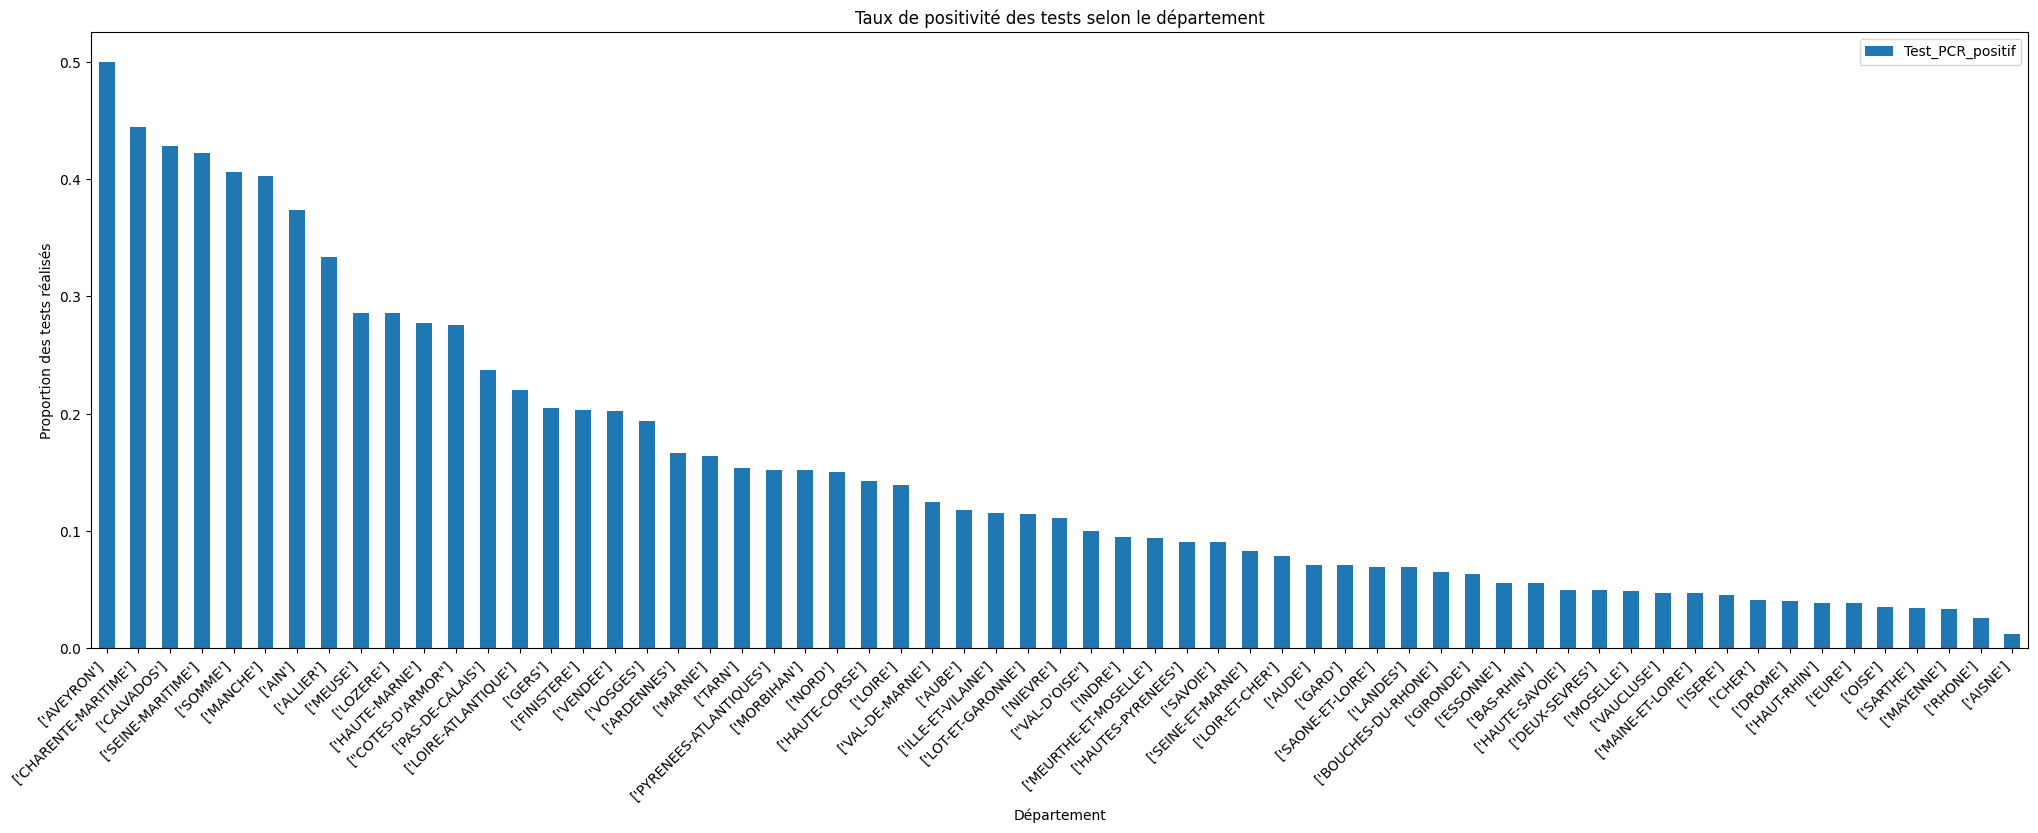

In [25]:
g_df = g.to_frame()
indices_a_supprimer = g_df[g_df['Test_PCR_positif'] == 0].index
g_df_sans_0 = g_df.drop(indices_a_supprimer)

g_df_sans_0.plot(kind='bar', stacked=True, figsize=(25, 8))
plt.title("Taux de positivité des tests selon le département")
plt.ylabel("Proportion des tests réalisés")
plt.xlabel("Département")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

**CARTES**

In [26]:
# LISTE DES COORDONNEES GPS :

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

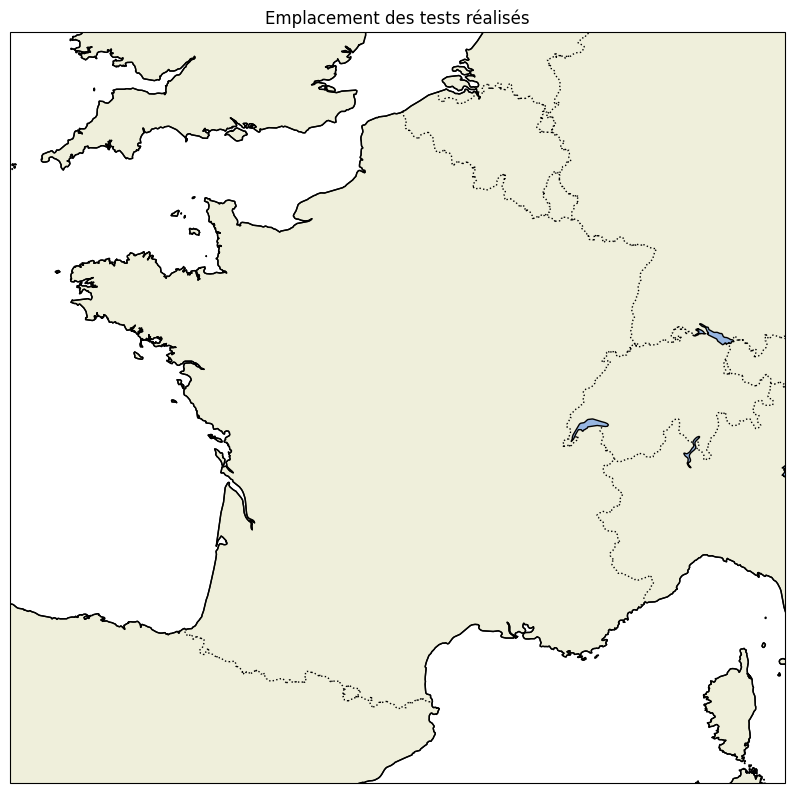

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=3.0, central_latitude=46.5, 
                                                               standard_parallels=(44.0, 49.0)))

# Carte de France :
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')


X = df['X_localisation']
Y = df['Y_localisation']

for x, y in zip(X, Y):
    ax.plot(x, y, 'bo', markersize=2)

plt.title('Emplacement des tests réalisés')
plt.show()

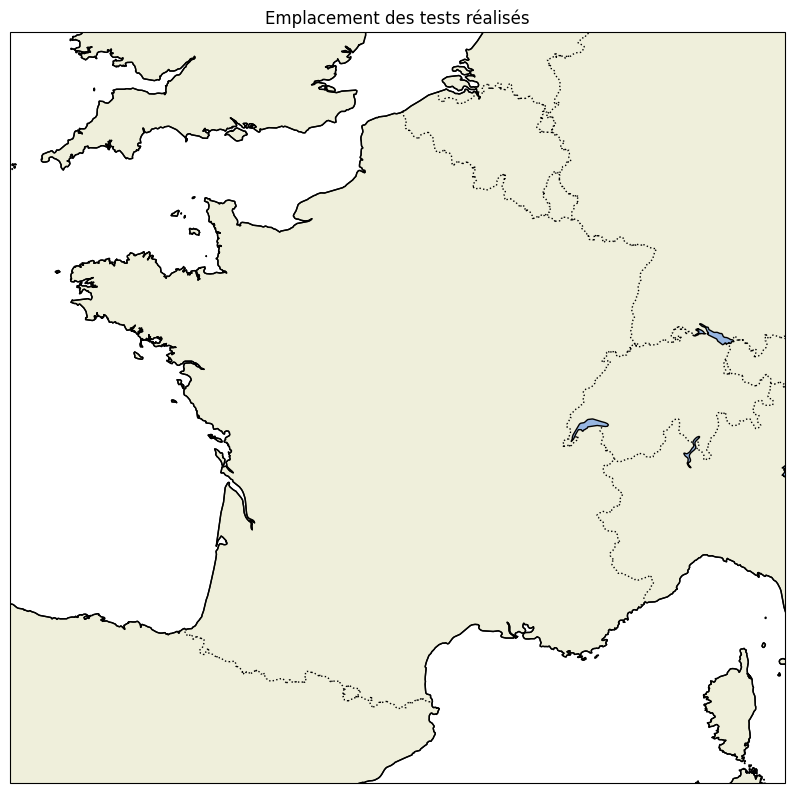

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=3.0, central_latitude=46.5, 
                                                               standard_parallels=(44.0, 49.0)))

# Carte de France :
ax.set_extent([-5, 10, 41, 52], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')


X = df['X_localisation']
Y = df['Y_localisation']

x = X.iloc[0]
y = Y.iloc[0]
ax.plot(x, y, 'ro', markersize=10, transform=ccrs.PlateCarree())

plt.title('Emplacement des tests réalisés')
plt.show()